In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os


/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
(x_train[0]).shape

(28, 28)

In [5]:
y_train[0]

5

In [6]:
x_val,x_tr=x_train[ :5000]/255,x_train[5000:]/255
y_val,y_tr=y_train[:5000]/255,y_train[5000:]/255

In [7]:
x_test=x_test/255

55000-x_train
5000-x_tr
10000-x_test

In [8]:
import matplotlib.pyplot as plt

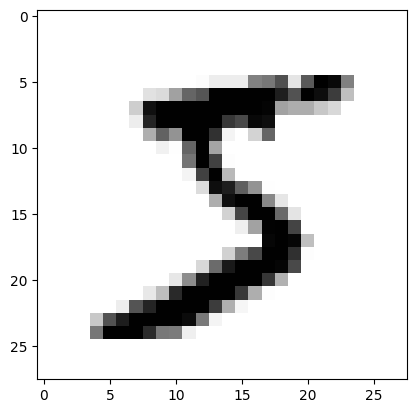

In [9]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

In [10]:
Layers=(tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer_1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer_2'),
        tf.keras.layers.Dense(10,activation='softmax',name='hiddenlayer_3')
        )

/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_clf=tf.keras.Sequential(Layers)

In [12]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer_1 (Dense)           │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer_2 (Dense)           │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer_3 (Dense)           │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hidden_1=model_clf.layers[1]

In [14]:
hidden_1

<Dense name=hiddenlayer_1, built=True>

In [15]:
hidden_1.get_weights()

[array([[-0.06295589,  0.05750439,  0.01237418, ...,  0.03186304,
          0.06583123,  0.02610943],
        [ 0.00591515, -0.02544169,  0.06985089, ..., -0.02139334,
          0.04417859, -0.00107855],
        [-0.01498852,  0.05166677,  0.05582887, ...,  0.04631215,
          0.02689219,  0.06569691],
        ...,
        [-0.02280265,  0.0148655 ,  0.05209474, ..., -0.05699506,
          0.02174966, -0.01619997],
        [ 0.02604932,  0.05499494, -0.01670315, ...,  0.00419068,
          0.07147644,  0.07032789],
        [ 0.05610357, -0.03440033,  0.00769331, ..., -0.00934558,
          0.02111986,  0.01889129]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [16]:
# Assuming 'hidden_1' is a layer in a compiled model
weights = hidden_1.get_weights()[0]
biases = hidden_1.get_weights()[1]

print("Weight matrix shape:", weights.shape)  # Example: (784, 300)
print("Bias vector shape:", biases.shape)    # Example: (300,)

Weight matrix shape: (784, 300)
Bias vector shape: (300,)


In [17]:
model_clf.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [18]:
Epochs=30
validation_set=(x_val,y_val)
history=model_clf.fit(x_tr,y_tr,epochs=Epochs,validation_data=validation_set,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.0978 - loss: 0.0941 - val_accuracy: 0.0958 - val_loss: 5.8852e-04
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.0963 - loss: 5.2449e-04 - val_accuracy: 0.0958 - val_loss: 2.6938e-04
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.0968 - loss: 2.5892e-04 - val_accuracy: 0.0958 - val_loss: 1.7147e-04
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.0979 - loss: 1.7560e-04 - val_accuracy: 0.0958 - val_loss: 1.2472e-04
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.1024 - loss: 1.2524e-04 - val_accuracy: 0.0958 - val_loss: 9.7490e-05
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.0978 - loss: 1.0658e-04 - val_accuracy: 0.0958 - val_loss: 7.9775e-05
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.0984 - loss: 8.7081e-05 - val_accuracy: 0.0958 - val_loss: 6.7357e-05
Epoch 8/30
1719/1719 ━━━

In [19]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [20]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.098800,0.018814,0.0958,0.000589
1,0.098982,0.000434,0.0958,0.000269
2,0.098982,0.000240,0.0958,0.000171
3,0.098982,0.000165,0.0958,0.000125
4,0.098982,0.000125,0.0958,0.000097
5,0.098982,0.000100,0.0958,0.000080
6,0.098982,0.000084,0.0958,0.000067
7,0.098982,0.000072,0.0958,0.000058
8,0.098982,0.000063,0.0958,0.000051
9,0.098982,0.000056,0.0958,0.000046


<Axes: >

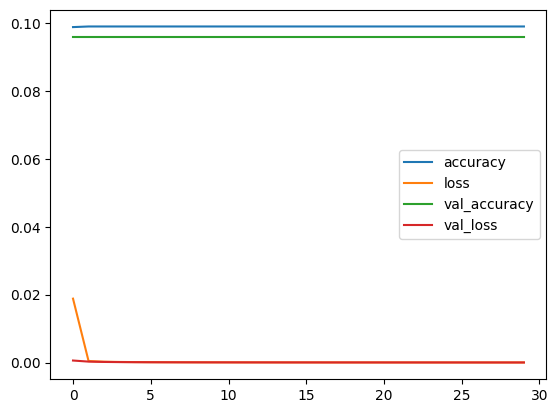

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.0924 - loss: 17.4179


[18.20169448852539, 0.09799999743700027]

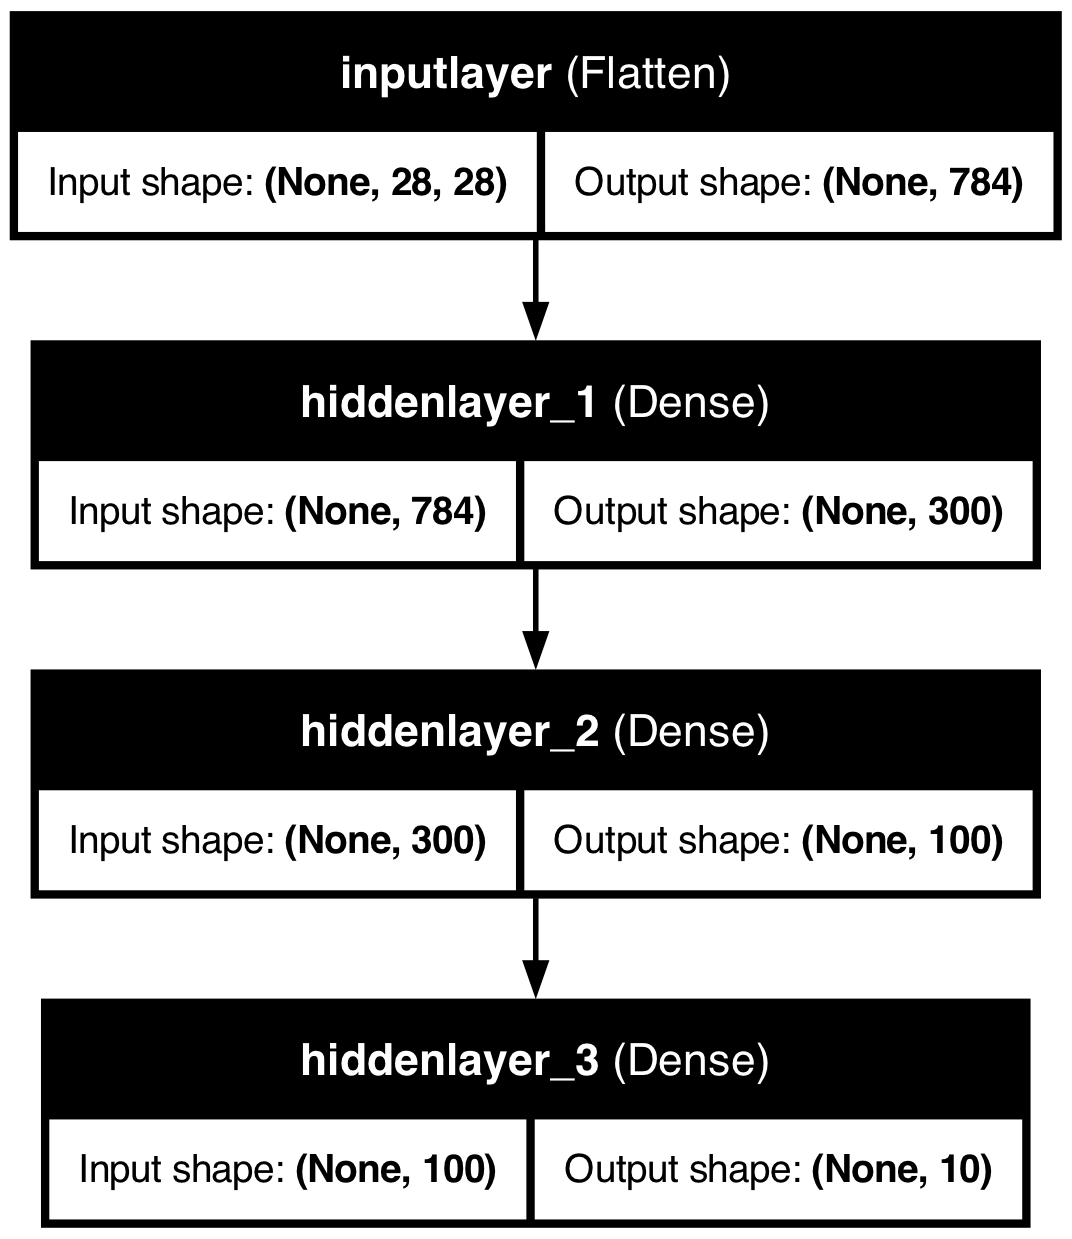

In [24]:
# Save and display the model architecture as an image
tf.keras.utils.plot_model(
    model_clf, 
    to_file='model_diagram.png',  # Output file name
    show_shapes=True,            # Show input and output shapes
    show_layer_names=True        # Display layer names
)


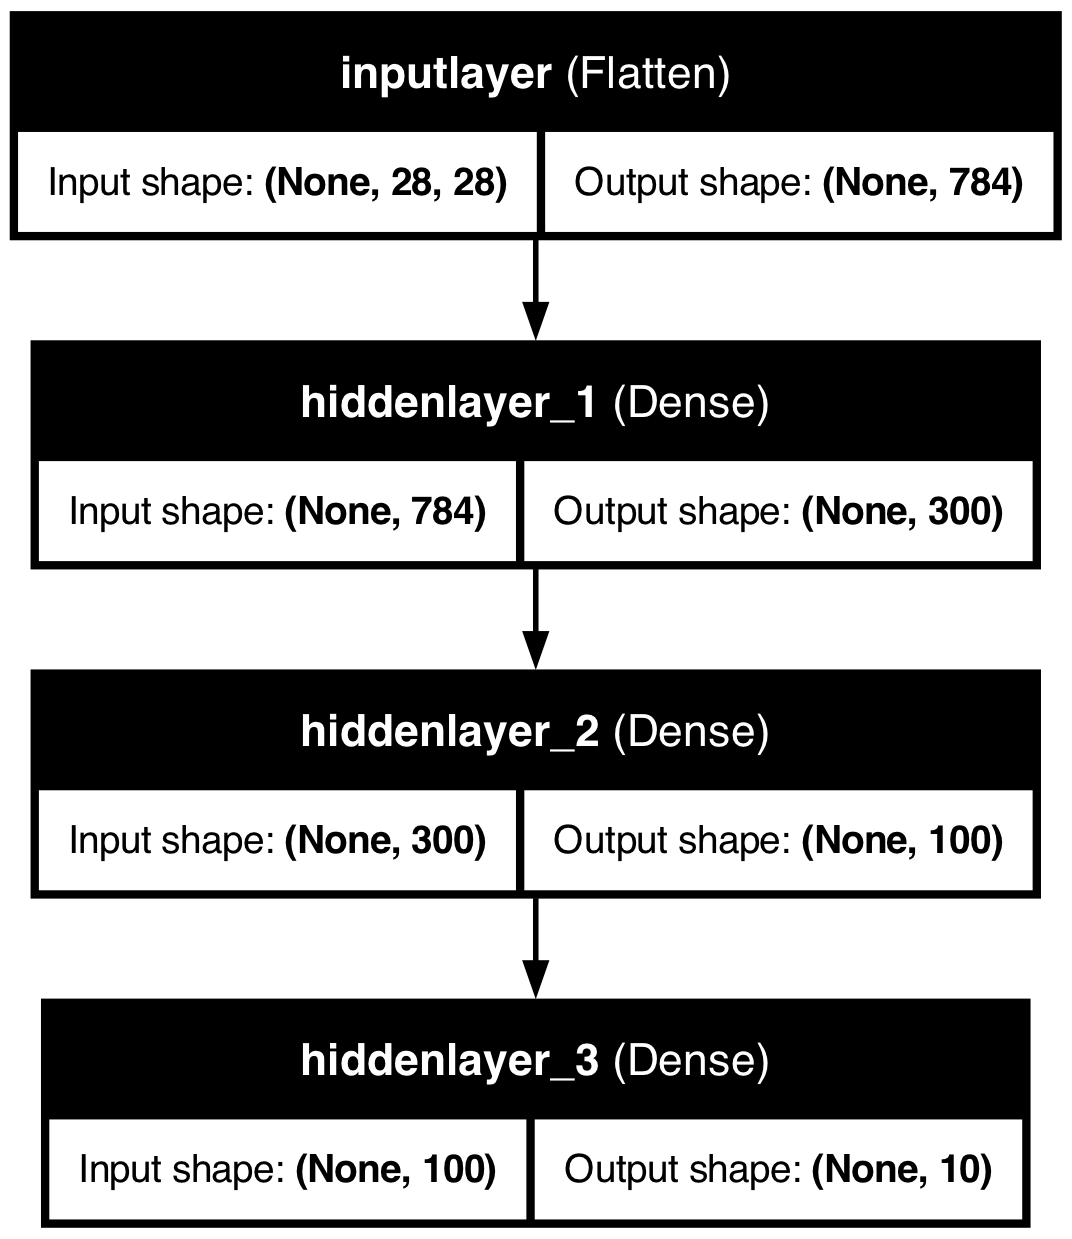

In [25]:
from IPython.display import Image
Image('model_diagram.png')